# term1_sprint7 機械学習スクラッチ クラスタリング

## 2.K-meansスクラッチ

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。  

《雛形》

In [1]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

## クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

《シンプルデータセット3》

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
X[:10]

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043]])

## 学習
K-meansの学習に必要な要素を順番に作成していきます。

## 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

### 1.1.1（データセットの分析）

In [4]:
print("配列",X.shape)

配列 (100, 2)


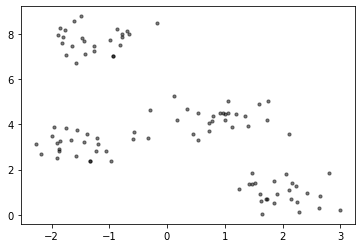

In [5]:
plt.scatter(X[:,0],X[:,1], c="black",s=10,alpha=0.5)

何となく４つに分類できるかも。

### 1.2.1（解答）

In [6]:
np.random.seed(1)
centers = np.array(X[np.random.randint(0,len(X),4)])

centers

array([[ 1.85367905,  1.5088862 ],
       [-1.26789718,  7.25141327],
       [ 0.92466065,  4.50908658],
       [-1.43284669,  7.71577043]])

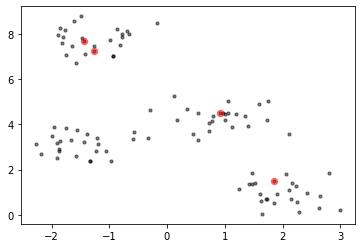

In [7]:
# サンプルデータの位置
plt.scatter(X[:,0],X[:,1], c="black",s=10,alpha=0.5)
# 中心点の初期値
plt.scatter(centers[:,0],centers[:,1], c="red",s=40,alpha=0.5)

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する$rnk$と$μk$を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2$$

n
 : データ点のインデックス


k
 : クラスタのインデックス


X
n
 : 
n
番目のデータ点


μ
k
 : 
k
番目の中心点


r
n
k
 : データ点
X
n
がクラスタ
k
に所属していたら1、そうでなければ0


### クラスタの割り当てと中心点の移動を繰り返す  
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。


中心点 
μ
k
 を固定した上で 
S
S
E
 を最小化する クラスタの割り当て 
r
n
k
 を選ぶ。
クラスタの割り当て 
r
n
k
 を固定した上で 
S
S
E
 を最小化する 中心点 
μ
k
 を選ぶ。

最初の中心点 
μ
k
 は問題1で作成した初期値です。


順番に見ていきます。


## 【問題3】クラスタへの割り当て
全てのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。
 
$$\|q-p\| = \sqrt{(q-p)\cdot(q-p)}$$
 
NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html


中心点 
μ
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

### 2.1.1（解答） 問題３の解答も含む

#### 重心までの距離をsumを使って算出

In [8]:
distance_list = []
idx = np.zeros(X.shape[0])

for i in range(X.shape[0]):
    # 各データ点毎の重心までの距離
    distance = np.sum((X[i,:] - centers)**2,axis=1)
    # 各データ点毎のクラスタを返す
    idx[i] = np.argmin(distance)
    # リストに保管
    distance_list.append(distance)
idx

array([2., 3., 2., 2., 2., 2., 2., 3., 2., 3., 1., 1., 1., 3., 1., 0., 0.,
       2., 2., 0., 2., 3., 2., 0., 2., 2., 2., 2., 0., 0., 0., 1., 0., 0.,
       2., 2., 3., 0., 3., 2., 2., 2., 1., 2., 2., 3., 0., 2., 2., 2., 2.,
       0., 2., 2., 2., 1., 3., 0., 0., 3., 1., 0., 0., 2., 0., 3., 2., 2.,
       0., 2., 3., 0., 2., 3., 2., 2., 2., 2., 0., 0., 0., 3., 2., 2., 0.,
       2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 3., 3., 2., 3., 2.])

### 2.1.2（別解） diver通りnp.linalg.normを使用

In [9]:
distance_matrix = np.zeros((X.shape[0],centers.shape[0]))

for i in range(centers.shape[0]):
    for j in range(X.shape[0]):
        diff = centers[i] - X[j]
        distance_matrix[j][i] = np.linalg.norm(diff, ord=2)
new_labels = np.argmin(distance_matrix,axis=1)
new_labels

array([2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 1, 1, 1, 3, 1, 0, 0, 2, 2, 0, 2, 3,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 3, 0, 3, 2, 2, 2, 1, 2,
       2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 3, 0, 0, 3, 1, 0, 0, 2, 0, 3,
       2, 2, 0, 2, 3, 0, 2, 3, 2, 2, 2, 2, 0, 0, 0, 3, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2])

### 2.1.3（検証） 比較

In [10]:
# 上記の２パターンの求めた値を比較
sym_diff = set(idx) ^ set(new_labels)
print(sym_diff)

set()


答えは一緒ではあるが、各値と重心までの距離は異なる。  
今回は指定されているので、以降np.linalg.normを使用。

## 問題７までの記述コードを記述したクラス

In [13]:
# 記入用
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        self.best_centers = None
        self.best_score = 10000
        
        self.center = self.n_clusters
           
        # 問題６-------------------------------------------

        for j in range(self.n_init):        
            
            # 問題5---------------------------------------
            
            for i in range(self.max_iter):
                
                # 問題１---------------------------
                
                self.X = np.array(X)
                self.centers = np.array(X[np.random.randint(0,len(X),self.center)])

                # -------------------------------
                
                distance_matrix = self._distance_matrix(self.X, self.centers)
                new_labels = self._new_labels(distance_matrix)
                sse_score = self._sse(distance_matrix, new_labels)
#                 print(f"sse_score{j+1}-{i+1}回目:{sse_score}")
                
                if self.best_score > sse_score:
                    self.best_score = sse_score
                    self.best_centers = self.centers
                
                if self.tol > sse_score:
                    break
                else:
                    self.centers = self._move(self.X, self.centers, new_labels)
                    
        return self.best_score
            # -------------------------------------------

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
    # 問題3-----------------------------------------------
    
    def _distance_matrix(self,X,C):
        distance_matrix = np.zeros((X.shape[0],C.shape[0]))
        
        for i in range(C.shape[0]):
            for j in range(X.shape[0]):
                diff = C[i] - X[j]
                distance_matrix[j][i] = np.linalg.norm(diff, ord=2)
        return distance_matrix       
                
    def _new_labels(self,X):
        return np.argmin(X,axis=1)
            
    # 問題4-------------------------------------------------
    
    def _move(self,X, C, label):
        for i in range(len(C)):
            a = X[label==i,:].mean(axis=0)
        return a
        
    # 問題２-------------------------------------------------
    
    def _sse(self, X, K):
        sse = 0
        
        for i, labels in enumerate(K):
            sse += X[i,labels]
        return sse
    
    # -----------------------------------------------------
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        distance_matrix = self._distance_matrix(X, self.best_centers)
        new_labels = self._new_labels(distance_matrix)
        return new_labels, self.best_centers

## 【問題4】中心点の移動
中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て 
r
n
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 
μ
k
 と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
μ
k
 を保持しておきます。

### 6.1.1（解答)

In [14]:
skm = ScratchKMeans(n_clusters=4, n_init=3, max_iter=5, tol=10)
skm.fit(X)

<ipython-input-13-a49b744edd8d>:93: RuntimeWarning: Mean of empty slice.
  a = X[label==i,:].mean(axis=0)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


113.22787309475068

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 
X
n
 と学習で決まった中心点 
μ
k
 に対し、 
S
S
E
 を最小化する 
r
n
k
 を選ぶ。

具体的には次のことです。


データ点 
X
n
 を最も近い 
μ
k
 に割り当てる。

### 7.1.1（解答）

In [15]:
y_pred, centers = skm.predict(X)
y_pred

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 0, 2, 2, 3, 0, 1,
       2, 3, 2, 2, 2, 2, 0, 3, 3, 1, 3, 0, 2, 2, 1, 3, 1, 2, 2, 2, 1, 2,
       2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 3, 1, 1, 3, 3, 2, 3, 1,
       2, 2, 3, 2, 1, 3, 2, 1, 2, 0, 2, 2, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3,
       0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2])

### 7.2.1（予備知識）

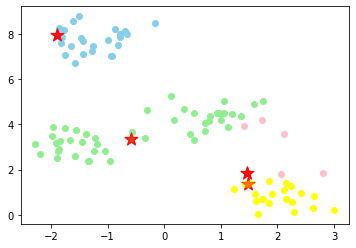

In [16]:
fig = plt.figure(figsize=(20,4))
color_list = ["pink","skyblue","lightgreen","yellow"]

ax1 = fig.add_subplot(1,3,1)
for i in range(centers.shape[0]):
    group_i = (X[y_pred==i,:])
    ax1.scatter(group_i[:,0],group_i[:,1],color=color_list[i])
    ax1.scatter(centers[:,0],centers[:,1], c="r",s=180,alpha=0.5,marker="*")

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

### 8.1.1（解答）

In [18]:
elbow = []

for i in range(1,11):
    skm = ScratchKMeans(n_clusters=i, n_init=3, max_iter=5, tol=10)
    score = skm.fit(X)
    elbow.append(score)
elbow

<ipython-input-13-a49b744edd8d>:93: RuntimeWarning: Mean of empty slice.
  a = X[label==i,:].mean(axis=0)


[264.8268116729737,
 204.4701656516373,
 115.89606175668479,
 77.9350981047922,
 76.36204021864228,
 62.76079375066863,
 67.87985160768679,
 54.0852810126413,
 53.26855427676947,
 51.15072317600694]

Text(0, 0.5, 'SSE')

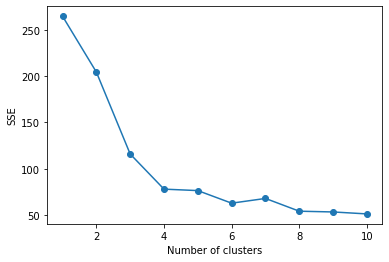

In [19]:
plt.plot(range(1,11), elbow, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

## 【問題9】（アドバンス課題）シルエット図
$k$を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。


Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


- silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数
- silhouette_avg : float、シルエット係数の平均値
- y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名
- cluster_labels : list、クラスタのラベル名のリスト
- n_clusters : int、クラスタ数  

$n$番目のデータ点に対するシルエット係数  
$sn$は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$s_n = \frac{b_n-a_n}{max(b_n,a_n)}$$


a
n
 : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。


b
n
 : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。


乖離度 
b
 が大きく、凝集度 
a
 が小さい時が理想的であり、シルエット係数 
s
 は1に近くなります。


《シルエット図を表示するためのコード》

### 9.1.1（解答） アドバンス問題のため、時間に余裕が出来たら行う。

# 3.クラスタ分析

卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。

UCI Machine Learning Repository: Wholesale customers Data Set  
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。


次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。


《PCAのサンプルコード》

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数kを選択してください。  
エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

### 10.1.1（データセット）

In [24]:
dataset = pd.read_csv("sample_dataset/Wholesale customers data.csv")
df = pd.DataFrame(dataset)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [25]:
client_list = df.drop(["Channel", "Region"], axis=1)
print("client_list.shape",client_list.shape)
client_list.head()

client_list.shape (440, 6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### 10.2.1（前処理）

In [26]:
# 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler([-1,1])
client_norm = scaler.fit_transform(client_list)
client_norm[:5]

array([[-0.77411991, -0.73854554, -0.83707169, -0.99378739, -0.8691456 ,
        -0.94430538],
       [-0.87420195, -0.73435181, -0.79380665, -0.94290316, -0.8388203 ,
        -0.92603254],
       [-0.88675679, -0.76163828, -0.83442017, -0.92176714, -0.82789536,
        -0.67288277],
       [-0.7634911 , -0.96892828, -0.90907229, -0.79031622, -0.97530864,
        -0.92553191],
       [-0.59674716, -0.85417262, -0.8448969 , -0.87213201, -0.91309034,
        -0.7838131 ]])

In [27]:
# 外れ値を除く標準化
from sklearn import preprocessing
rscaler = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
rscaler.fit(client_list)
client_rsc = rscaler.transform(client_list)
client_rsc[:5]

array([[ 0.30168043,  1.06571214,  0.32995207, -0.46657183,  0.50678671,
         0.2638102 ],
       [-0.1048095 ,  1.09293385,  0.56599336,  0.08392603,  0.67567015,
         0.5740085 ],
       [-0.15580183,  0.91581599,  0.34441798,  0.3125889 ,  0.73651183,
         4.87145892],
       [ 0.34485007, -0.42971408, -0.06286202,  1.73470839, -0.08444172,
         0.58250708],
       [ 1.02209184,  0.3151708 ,  0.28726   ,  0.84957326,  0.26205579,
         2.98831445]])

In [28]:
# 対数変換
client_log = np.log(client_list)
client_log[:5]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [29]:
# 対数変換 → 外れ値を除く標準化
rscaler = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
rscaler.fit(client_log)
client_rslg = rscaler.transform(client_log)
client_rslg[:5]

array([[ 0.23601303,  0.63356598,  0.28995172, -1.2542388 ,  0.43514635,
         0.21827309],
       [-0.11042642,  0.64380396,  0.43715984,  0.09182435,  0.51152392,
         0.40771482],
       [-0.17264818,  0.57409063,  0.30004203,  0.2904559 ,  0.53555886,
         1.40138075],
       [ 0.26323078, -0.71784029, -0.07455411,  0.91576648, -0.17478537,
         0.41221963],
       [ 0.57908794,  0.25871588,  0.25918691,  0.60156542,  0.28525161,
         1.12444458]])

### （予備知識）PCA=主成分分析

可視化しやすいように特徴量を抽出して、２次元まで特徴を減らす手法。(次元削除）  
次元を減らす減らさない、何個まで減らす等の規定は無い。  
主成分分析は教師なし学習なので、正解（ラベルや教師データ）がないため、分散によって次元の重要度を決めます。  

**主成分分析の評価方法（累積寄与率）**  
一般的に累積寄与率が80%となるよう、主成分を抽出すると良いとされています。  
explained_variance_ratio_メソッドを使うことで、計算することが出来ます。

In [30]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca1 = pca.fit(client_norm)
pca2 = pca.fit(client_rsc)
pca3 = pca.fit(client_log)
pca4 = pca.fit(client_rslg)
pca5 = pca.fit(client_list)

data_pca1 = pca1.transform(client_norm)
data_pca2 = pca2.transform(client_rsc)
data_pca3 = pca3.transform(client_log)
data_pca4 = pca4.transform(client_rslg)
data_pca5 = pca5.transform(client_rslg)

[0.51948323 0.7835533  0.8896143  0.95219446 0.98716868 1.        ]


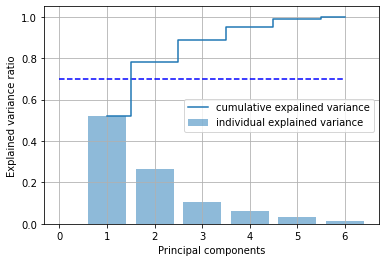

In [31]:
# 主成分分析の評価（正規化）
from sklearn.decomposition import PCA
pca1 = PCA(n_components=None)
pca1 = pca1.fit(client_norm)
var_exp1 = pca1.explained_variance_ratio_
cum_var_exp1 = np.cumsum(var_exp1)
print(cum_var_exp1)
plt.bar(range(1,7), var_exp1, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp1, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

[0.44377284 0.7462558  0.89658575 0.95360082 0.99278014 1.        ]


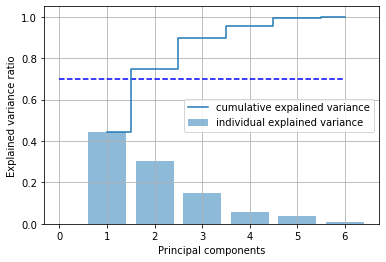

In [32]:
# 主成分分析の評価（標準化）
from sklearn.decomposition import PCA
pca2 = PCA(n_components=None)
pca2 = pca2.fit(client_rsc)
var_exp2 = pca2.explained_variance_ratio_
cum_var_exp2 = np.cumsum(var_exp2)
print(cum_var_exp2)
plt.bar(range(1,7), var_exp2, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp2, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


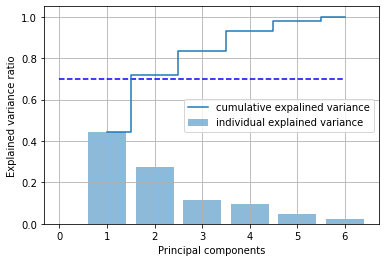

In [33]:
# 主成分分析の評価（対数変換）
from sklearn.decomposition import PCA
pca3 = PCA(n_components=None)
pca3 = pca3.fit(client_log)
var_exp3 = pca3.explained_variance_ratio_
cum_var_exp3 = np.cumsum(var_exp3)
print(cum_var_exp3)
plt.bar(range(1,7), var_exp3, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp3, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

[0.35751386 0.68902866 0.82149452 0.93884668 0.97651529 1.        ]


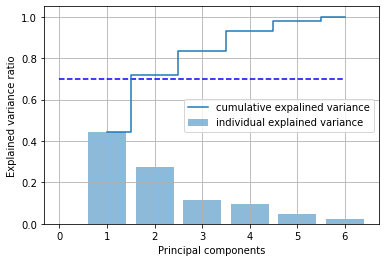

In [34]:
# 主成分分析の評価（対数変換 → 標準化）
from sklearn.decomposition import PCA
pca4 = PCA(n_components=None)
pca4 = pca4.fit(client_rslg)
var_exp4 = pca4.explained_variance_ratio_
cum_var_exp4 = np.cumsum(var_exp4)
print(cum_var_exp4)
plt.bar(range(1,7), var_exp3, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp3, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

[0.35751386 0.68902866 0.82149452 0.93884668 0.97651529 1.        ]


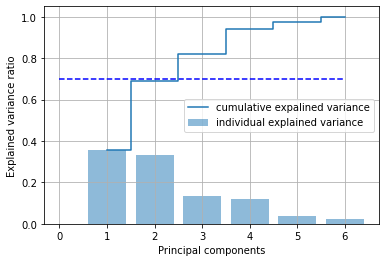

In [35]:
# 主成分分析の評価（元データ）
from sklearn.decomposition import PCA
pca5 = PCA(n_components=None)
pca5 = pca5.fit(client_rslg)
var_exp5 = pca5.explained_variance_ratio_
cum_var_exp5 = np.cumsum(var_exp5)
print(cum_var_exp5)
plt.bar(range(1,7), var_exp5, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp5, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

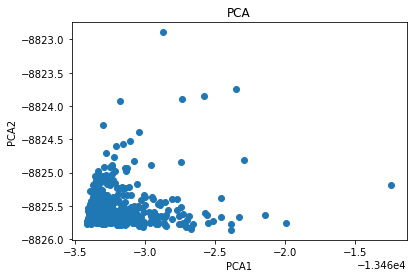

In [36]:
# 主成分をプロットする(正規化)
plt.scatter(data_pca1[:, 0], data_pca1[:, 1])
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('PCA_sample1')
plt.show()

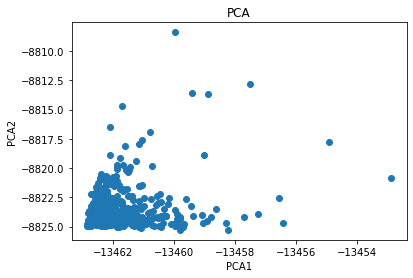

In [37]:
# 主成分をプロットする（標準化）
plt.scatter(data_pca2[:, 0], data_pca2[:, 1])
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('PCA_sample1')
plt.show()

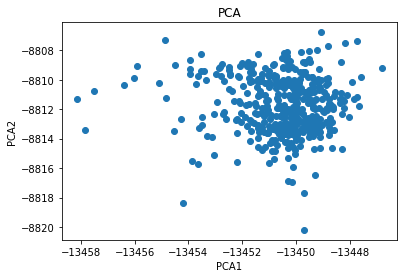

In [38]:
# 主成分をプロットする（対数変換）
plt.scatter(data_pca3[:, 0], data_pca3[:, 1])
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('PCA_sample1')
plt.show()

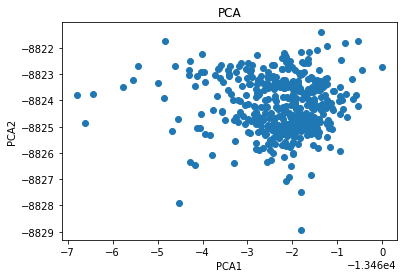

In [39]:
# 主成分をプロットする（対数変換）
plt.scatter(data_pca4[:, 0], data_pca4[:, 1])
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('PCA_sample1')
plt.show()

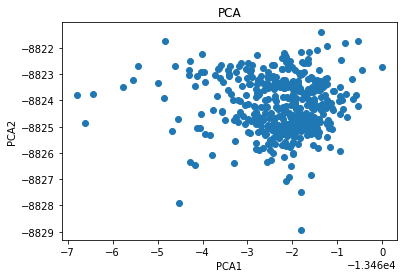

In [40]:
# 主成分をプロットする（元データ）
plt.scatter(data_pca5[:, 0], data_pca5[:, 1])
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('PCA_sample1')
plt.show()

### 10.3.1（検証）

<ipython-input-13-a49b744edd8d>:93: RuntimeWarning: Mean of empty slice.
  a = X[label==i,:].mean(axis=0)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Text(0, 0.5, 'SSE')

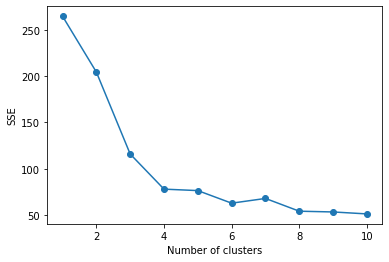

In [41]:
elbow1 = []

for i in range(1,11):
    skm = ScratchKMeans(n_clusters=i, n_init=3, max_iter=5, tol=10)
    score1 = skm.fit(data_pca4)
    elbow1.append(score1)
plt.plot(range(1,11), elbow, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [42]:
skm = ScratchKMeans(n_clusters=3, n_init=3, max_iter=5, tol=10)
skm.fit(data_pca4)
pca4_pred, pca4_centers = skm.predict(data_pca4)
pca4_pred[:10]

<ipython-input-13-a49b744edd8d>:93: RuntimeWarning: Mean of empty slice.
  a = X[label==i,:].mean(axis=0)


array([0, 0, 0, 2, 0, 0, 0, 0, 1, 0])

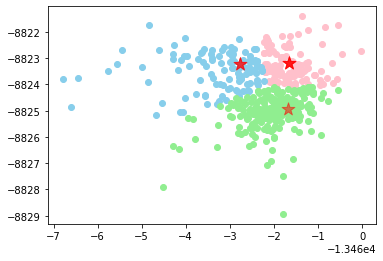

In [43]:
fig = plt.figure(figsize=(20,4))
color_list = ["pink","skyblue","lightgreen","yellow"]

ax1 = fig.add_subplot(1,3,1)
for i in range(pca4_centers.shape[0]):
    group_i = (data_pca4[pca4_pred==i,:])
    ax1.scatter(group_i[:,0],group_i[:,1],color=color_list[i])
    ax1.scatter(pca4_centers[:,0],pca4_centers[:,1], c="r",s=180,alpha=0.5,marker="*")

### 10.4.1（元データで検証】

<ipython-input-13-a49b744edd8d>:93: RuntimeWarning: Mean of empty slice.
  a = X[label==i,:].mean(axis=0)


Text(0, 0.5, 'SSE')

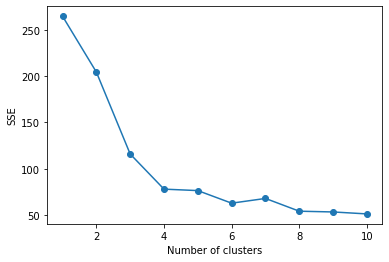

In [44]:
elbow1 = []

for i in range(1,11):
    skm = ScratchKMeans(n_clusters=i, n_init=3, max_iter=5, tol=10)
    score1 = skm.fit(data_pca5)
    elbow1.append(score1)
plt.plot(range(1,11), elbow, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [45]:
skm = ScratchKMeans(n_clusters=3, n_init=3, max_iter=5, tol=10)
skm.fit(data_pca5)
pca5_pred, pca5_centers = skm.predict(data_pca5)
pca5_pred[:100]

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1])

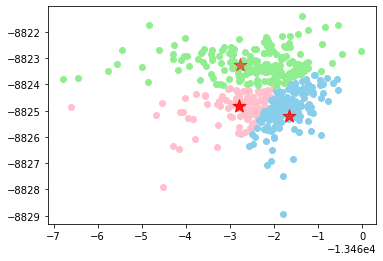

In [46]:
fig = plt.figure(figsize=(20,4))
color_list = ["pink","skyblue","lightgreen","yellow"]

ax1 = fig.add_subplot(1,3,1)
for i in range(pca5_centers.shape[0]):
    group_i = (data_pca5[pca5_pred==i,:])
    ax1.scatter(group_i[:,0],group_i[:,1],color=color_list[i])
    ax1.scatter(pca5_centers[:,0],pca5_centers[:,1], c="r",s=180,alpha=0.5,marker="*")

### 10.4.1（解答）

エルボー法の結果と、元データのRegion（３分類）とChannel（２分類）の分類数から２or3で分類する事が有力な方法だと考える。  
pcaの評価でも2は80%手前、3は80%以上と良さそうな評価を得ている。  
Region、Channelとの検証は事項で検証を行う。

## 【問題11】既知のグループとの比較  
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。  
クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

### 11.1.1（検証）

In [47]:
# クラスターを入れたdfを作成
cluster_df = pd.DataFrame(pca4_pred, columns=["cluster"])
new_df = pd.concat([df, cluster_df],axis=1)
new_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,2


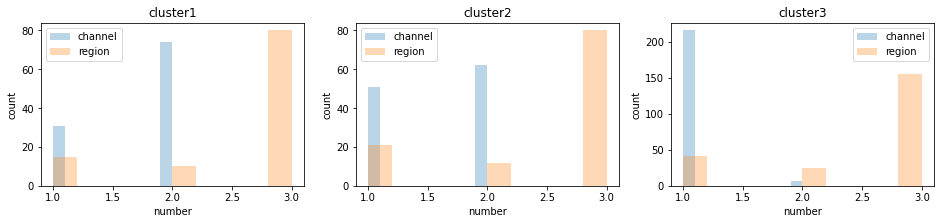

In [48]:
# クラスタ毎のChannel、Regionの割合をプロット
fig = plt.figure(figsize=(16,3))
color_list = ["pink","skyblue","lightgreen","yellow"]

for i in range(3):
    ax = fig.add_subplot(1,3,(i+1))
    ax.hist(new_df[new_df["cluster"]==i].loc[:,"Channel"], alpha = 0.3, label="channel")
    ax.hist(new_df[new_df["cluster"]==i].loc[:,"Region"], alpha = 0.3, label="region")
    plt.title(f"cluster{i+1}")
    plt.xlabel("number")
    plt.ylabel("count")
    plt.legend()

### 11.1.1（解答）

Regionに関しては、クラスタ毎割合も同じ様な傾向があり特出した特徴が見受けられない。  
channelはクラスタ２に所属するデータが極端に2のchannelに所属していないため、何かしらの法則を見つけられる可能性があるので事項で検証したいと思う。

## 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


《ヒント》  
前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。

条件ごとにデータを見る際にはPandasのgroupbyが便利です。  
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

### 12.1.1（groupby)

In [65]:
# クラスタ毎のdescribe比較
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 150)

new_df.groupby(["cluster","Region","Channel"]).describe()

Fresh                                               \
                        count     mean      std      min      25%      50%   
cluster Region Channel                                                       
0       1      1         8.00 21532.25 16358.68  5909.00  9334.75 18206.50   
               2         7.00 10292.71  5628.89  4484.00  5842.00 11072.00   
        2      1         1.00 32717.00      nan 32717.00 32717.00 32717.00   
               2         9.00 11075.11  6850.78  5283.00  6758.00  8565.00   
        3      1        22.00 28971.32 25158.67  4625.00 12550.50 18995.50   
               2        58.00 14773.66  8964.13  4098.00  8077.50 12221.50   
1       1      1        10.00  2145.20  1467.34   514.00  1107.25  1995.50   
               2        11.00  1959.18  1067.03    18.00  1090.00  2427.00   
        2      1         4.00   850.75   784.48     3.00   333.75   813.00   
               2         8.00  1802.38  1349.35   161.00   749.25  1808.00   
        3      1        37.00  2150.46  1981.50     3.00   694.00  1502.00   
               2        43.00  2166.95  1992.10    23.00   502.50  1531.00   
2       1      1        41.00 13842.02 11350.19  1869.00  7274.00  9670.00   
        2      1        23.00 12612.83  7503.50   542.00  7080.50 10617.00   
               2         2.00 12205.50  6530.13  7588.00  9896.75 12205.50   
        3      1       152.00 14548.24 12088.13   403.00  6008.75 11278.50   
               2         4.00 20564.25 12974.87 11867.00 12826.25 15355.50   

                                            Milk                             \
                            75%       max  count     mean      std      min   
cluster Region Channel                                                        
0       1      1       29800.50  53205.00   8.00 10558.25  6864.27  3576.00   
               2       12013.50  20782.00   7.00 14078.57  8710.06  5921.00   
        2      1       32717.00  32717.00   1.00 16784.00      nan 16784.00   
               2       11223.00  27082.00   9.00 10214.89  7027.21  3199.00   
        3      1       36248.75 112151.00  22.00  9846.18 10193.48  1266.00   
               2       19574.50  44466.00  58.00 13255.57 13185.35  2884.00   
1       1      1        2690.50   5396.00  10.00  6078.30  3510.40   685.00   
               2        2665.50   3067.00  11.00  8687.45  4038.20  2527.00   
        2      1        1330.00   1774.00   4.00  1999.00  1642.73   333.00   
               2        2670.75   3996.00   8.00  9983.25  6044.96  3688.00   
        3      1        3087.00   7780.00  37.00  4730.59  3254.42   727.00   
               2        3251.00   8590.00  43.00  8653.53  4702.76  1275.00   
2       1      1       18226.00  56083.00  41.00  2026.66  1456.94   258.00   
        2      1       17130.00  29635.00  23.00  1727.78   743.75   713.00   
               2       14514.25  16823.00   2.00  1412.50   685.19   928.00   
        3      1       19350.75  76237.00 152.00  2263.85  1875.19    55.00   
               2       23093.50  39679.00   4.00  3020.25  1289.24  1124.00   

                                                           Grocery           \
                            25%      50%      75%      max   count     mean   
cluster Region Channel                                                        
0       1      1        6646.50  7868.00 13108.25 23527.00    8.00  9134.00   
               2        7021.00 12729.00 18766.00 28326.00    7.00 21347.00   
        2      1       16784.00 16784.00 16784.00 16784.00    1.00 13626.00   
               2        4980.00  6817.00 13316.00 25071.00    9.00 20872.44   
        3      1        4011.50  5771.00 10591.25 43950.00   22.00 10270.23   
               2        6248.00  9020.00 12686.00 73498.00   58.00 17262.02   
1       1      1        4057.00  6491.00  8118.00 10765.00   10.00  6462.00   
               2        6352.50  7504.00 10737.00 16599.00   11.00 16642.36   
        2    

### 12.2.1（解答）まとめ  
- cluster0に分類される業者は全体的に売上が高い傾向にある。　　  
- cluster１に分類される業者はFresh、Frozenの売上が低い傾向にある。　　  
- cluster２に分類される業者はMilk、Groceryの売上が低い傾向にある。　　
- cluster0で培われたchannel毎の販売手法を用いる事で、cluster１、２の低迷商品の売上向上に繋がると思われる。

# 4.他の非階層クラスタリング手法  余裕ができた行う、

## 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。


DBSCANのメリット・デメリット
t-SNE、LLEのメリット・デメリット

について記述してください。

## 【問題14】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。


sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


《パラメーターチューニング》


これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。


t-SNEの論文  
http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf


DBSCANの論文  
https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf